In [5]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [6]:
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='rbf',probability=True)

In [7]:
clf = model.fit(X, Y)
y_pred = clf.predict(X)
print(y_pred)
y_pred2 = clf.predict_proba(X)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.98663203 0.01336797]
 [0.98106172 0.01893828]
 [0.9877134  0.0122866 ]
 [0.98016033 0.01983967]
 [0.98785783 0.01214217]
 [0.97527099 0.02472901]
 [0.98737638 0.01262362]
 [0.98349721 0.01650279]
 [0.97963832 0.02036168]
 [0.97895545 0.02104455]
 [0.98208985 0.01791015]
 [0.98075383 0.01924617]
 [0.98163924 0.01836076]
 [0.98816883 0.01183117]
 [0.9823953  0.0176047 ]
 [0.97541056 0.02458944]
 [0.98725112 0.01274888]
 [0.98663203 0.01336797]
 [0.96596004 0.03403996]
 [0.98584413 0.01415587]
 [0.96593336 0.03406664]
 [0.98541741 0.01458259]
 [0.9926221  0.0073779 ]
 [0.96951182 0.03048818]
 [0.95787075 0.04212925]
 [0.96840829 0.03159171]
 [0.97942429 0.02057571]
 [0.98285467 0.01714533]
 [0.98485664 0.01514336]
 [0.97727079 0.02272921]
 [0.97410861 0.02589139]
 [0.97849427 0.021505

In [50]:
tmp = np.linspace(-5,5,9)
x,y,z = np.meshgrid(tmp,tmp,tmp)
x = x.reshape(-1)
y = y.reshape(-1)
z = z.reshape(-1)

In [51]:
cat = np.vstack([x,y,z])
cat2 =cat.T

In [52]:
y_pred2 = clf.predict_proba(cat2)

<IPython.core.display.Javascript object>


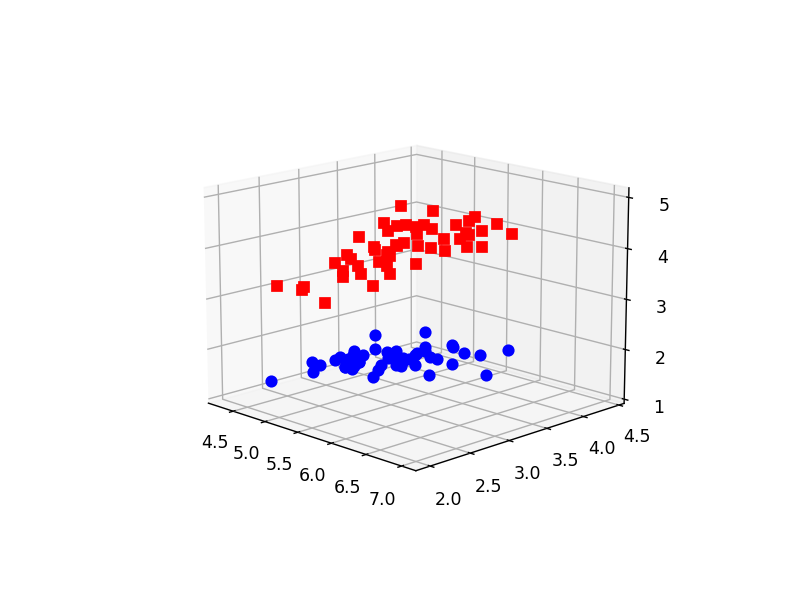

In [53]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')

In [63]:
idx = np.where(y_pred2[:,0]-y_pred2[:,1]<0.001)
xyz = cat2[idx,:]
out = np.squeeze(xyz)

https://qiita.com/thtitech/items/4c0777f3825572d7e0eb

In [69]:
from scipy.interpolate import griddata
x = out[:,]
y = out[:,1]
y = out[:,2]
x_new, y_new = np.meshgrid(np.unique(x), np.unique(y))
z_new = griddata((x, y), z, (x_new, y_new))

ValueError: shape mismatch: objects cannot be broadcast to a single shape